# Objective 
One thing I would like to do with random walks is try a self avoiding random walk. To do that I am going to need to reflect a series of coordinates across a line through an arbitrary point. I think the most intuitive way for me to to go about that is matrix transformations. So the first section is to brush up on my matrix operations. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

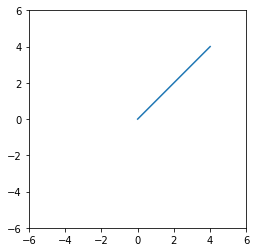

In [80]:
# Create a starting line
N = 5
dims = 2
points = np.empty((dims,N))
for r in range(N):
    points[:,r]=(r,r)

plt.plot(points[0,:], points[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
points

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0., -1., -2., -3., -4.]])

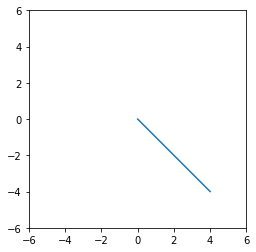

In [81]:
# Reflect about the x axis
r_x = np.asarray([[1,0],[0,-1]])
results = np.matmul(r_x, points)
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
results

array([[ 0., -1., -2., -3., -4.],
       [ 0.,  1.,  2.,  3.,  4.]])

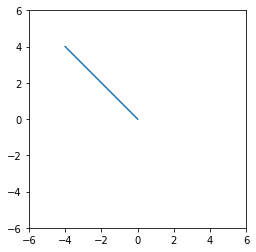

In [82]:
# Reflect about the y axis
r_x = np.asarray([[-1, 0], [0,1]])
results = np.matmul(r_x, points)
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
results

array([[ 0., -1., -2., -3., -4.],
       [ 0., -1., -2., -3., -4.]])

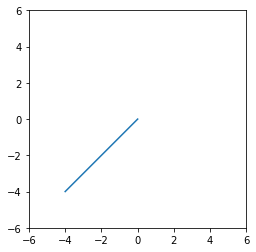

In [83]:
# Reflect about the origin
r_x = np.asarray([[-1, 0], [0,-1]])
results = np.matmul(r_x, points)
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
results

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.41421356, 2.82842712, 4.24264069, 5.65685425]])

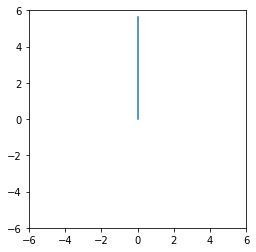

In [84]:
# Rotate 45 degrees
rot_degrees = 45
rot_rad = np.radians(rot_degrees)
r_rot = np.asarray([[np.cos(rot_rad), -np.sin(rot_rad)], [np.sin(rot_rad), np.cos(rot_rad)]])
results = np.matmul(r_rot, points)
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
results

array([[ 0.        ,  1.3660254 ,  2.73205081,  4.09807621,  5.46410162],
       [ 0.        , -0.3660254 , -0.73205081, -1.09807621, -1.46410162]])

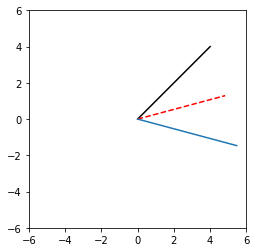

In [85]:
# Reflect across a line at an angle through the origin
rot_degrees = 15
length = 5
rot_rad = np.radians(rot_degrees)
r_rot = np.asarray([[np.cos(2*rot_rad), np.sin(2*rot_rad)], [np.sin(2*rot_rad), -np.cos(2*rot_rad)]])
results = np.matmul(r_rot, points)
plt.plot(points[0,:], points[1,:], color='k')
plt.plot([0, length*np.cos(rot_rad)], [0, 5*np.sin(rot_rad)], color='r', linestyle='--')
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
results

array([[-0.81766411,  0.59116795,  2.        ,  3.40883205,  4.81766411],
       [ 2.24651367,  2.12325683,  2.        ,  1.87674317,  1.75348633]])

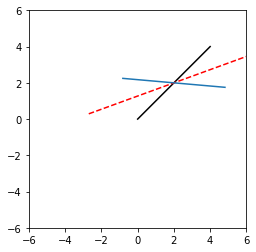

In [86]:
# Reflect across a point on the line at an angle
idx = 2
rot_degrees = 20
length = 5
rot_rad = np.radians(rot_degrees)

# Create a copy of our array for our transformation
result = points.copy()

#Move the array so that our desired point is at the origin
result[0,:] = result[0,:]-points[0,idx]
result[1,:] = result[1,:]-points[1,idx]

#Rotate the array about the angle
r_rot = np.asarray([[np.cos(2*rot_rad), np.sin(2*rot_rad)], [np.sin(2*rot_rad), -np.cos(2*rot_rad)]])
results = np.matmul(r_rot, result)

#Move the array back so that 0,0 is now the origin
results[0,:] = results[0,:]+points[0,idx]
results[1,:] = results[1,:]+points[1,idx]

plt.plot(points[0,:], points[1,:], color='k')
plt.plot([points[0,idx]+-length*np.cos(rot_rad), points[0,idx]+length*np.cos(rot_rad)],
         [points[1,idx]+-length*np.sin(rot_rad), points[1,idx]+5*np.sin(rot_rad)], color='r', linestyle='--')
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')

results

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        2.22044605e-16],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00]])

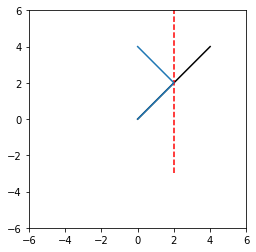

In [87]:
# Reflect only a portion of the line (above the point), across a point on the line at an angle
idx = 2
rot_degrees = 90
length = 5
rot_rad = np.radians(rot_degrees)

# Create a copy of our array for our transformation
results = points.copy()

#Move the array so that our desired point is at the origin
results[0,idx:] = results[0,idx:]-points[0,idx]
results[1,idx:] = results[1,idx:]-points[1,idx]

#Rotate the array about the angle
r_rot = np.asarray([[np.cos(2*rot_rad), np.sin(2*rot_rad)], [np.sin(2*rot_rad), -np.cos(2*rot_rad)]])
results[:,idx:] = np.matmul(r_rot, result[:,idx:])

#Move the array back so that 0,0 is now the origin
results[0,idx:] = results[0,idx:]+points[0,idx]
results[1,idx:] = results[1,idx:]+points[1,idx]

#Plot the orignal line (black), reflection line (dashed red), new line (blue)
plt.plot(points[0,:], points[1,:], color='k')
plt.plot([points[0,idx]+-length*np.cos(rot_rad), points[0,idx]+length*np.cos(rot_rad)],
         [points[1,idx]+-length*np.sin(rot_rad), points[1,idx]+5*np.sin(rot_rad)], color='r', linestyle='--')
plt.plot(results[0,:], results[1,:])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')

results